In [106]:
import pandas as pd
import numpy as np

In [107]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [108]:
df = pd.read_csv("/content/gdrive/MyDrive/MITMO/Бережков Проектирование ИС/Лабы/basketball.csv", index_col=False, sep=',', encoding='utf-8')

In [109]:
df

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,scrape_time,data_source
0,Jim Baechtold,SF,25.0,BLB,64,NaN,1893,242,621,0.390,NaN,NaN,NaN,242,621,0.389694,0.390,177,240,0.738,NaN,NaN,219,154,NaN,NaN,NaN,203,661,1952-1953,1952,2014-12-27 11:45:28,Basketball-Reference
1,Don Barksdale,PF,29.0,BLB,65,NaN,2298,321,829,0.387,NaN,NaN,NaN,321,829,0.387214,0.387,257,401,0.641,NaN,NaN,597,166,NaN,NaN,NaN,273,899,1952-1953,1952,2014-12-27 11:45:28,Basketball-Reference
2,Leo Barnhorst,SF,28.0,INO,71,NaN,2871,402,1034,0.389,NaN,NaN,NaN,402,1034,0.388781,0.389,163,259,0.629,NaN,NaN,483,277,NaN,NaN,NaN,245,967,1952-1953,1952,2014-12-27 11:45:28,Basketball-Reference
3,Nelson Bobb,PG,28.0,PHW,55,NaN,1286,119,318,0.374,NaN,NaN,NaN,119,318,0.374214,0.374,105,162,0.648,NaN,NaN,157,192,NaN,NaN,NaN,161,343,1952-1953,1952,2014-12-27 11:45:28,Basketball-Reference
4,Vince Boryla,SF,25.0,NYK,66,NaN,2200,254,686,0.370,NaN,NaN,NaN,254,686,0.370262,0.370,165,201,0.821,NaN,NaN,233,166,NaN,NaN,NaN,226,673,1952-1953,1952,2014-12-27 11:45:28,Basketball-Reference
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18797,James Young,SG,19.0,BOS,5,0.0,18,5,8,0.625,1.0,3.0,0.333333,4,5,0.800000,0.688,0,1,0.000,0.0,2.0,2,1,0.0,1.0,0.0,1,11,2014-2015,2014,2014-12-27 11:45:28,Basketball-Reference
18798,Nick Young,SG,29.0,LAL,20,0.0,500,96,240,0.400,49.0,112.0,0.437500,47,128,0.367188,0.502,57,64,0.891,6.0,47.0,53,16,13.0,9.0,17.0,43,298,2014-2015,2014,2014-12-27 11:45:28,Basketball-Reference
18799,Thaddeus Young,PF,26.0,MIN,23,23.0,743,143,323,0.443,7.0,28.0,0.250000,136,295,0.461017,0.454,39,69,0.565,31.0,73.0,104,50,39.0,11.0,37.0,54,332,2014-2015,2014,2014-12-27 11:45:28,Basketball-Reference
18800,Cody Zeller,C,22.0,CHO,30,14.0,696,81,178,0.455,0.0,0.0,NaN,81,178,0.455056,0.455,72,94,0.766,53.0,107.0,160,33,12.0,19.0,30.0,80,234,2014-2015,2014,2014-12-27 11:45:28,Basketball-Reference


In [110]:
df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.
count,18795.000000,18802.000000,13945.000000,18802.000000,18802.000000,18802.000000,18753.00000,14510.000000,14510.000000,12006.000000
mean,26.628093,55.878577,26.577196,1345.847463,220.902404,482.983353,0.43746,22.668780,64.932116,0.244135
std,3.888972,25.158885,29.790347,952.280057,196.207831,412.462391,0.08763,38.772323,102.741144,0.176610
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,24.000000,37.000000,1.000000,469.000000,57.000000,136.000000,0.40100,0.000000,1.000000,0.076923
50%,26.000000,65.000000,11.000000,1271.000000,172.000000,386.000000,0.44300,3.000000,12.000000,0.285714
75%,29.000000,78.000000,53.000000,2136.000000,336.000000,737.750000,0.48300,28.000000,87.000000,0.361111
max,44.000000,88.000000,83.000000,3882.000000,1597.000000,3159.000000,1.00000,272.000000,678.000000,1.000000


In [111]:
df.iloc[:,[13,14,15,16,17,18,19,20,21,22]].describe()

,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb
count,18802.000000,18802.000000,18740.000000,18753.000000,18802.000000,18802.000000,18334.000000,16063.000000,16063.000000,18802.000000
mean,203.408308,432.873524,0.450590,0.455979,115.784438,154.444740,0.721347,70.566831,163.412937,251.391395
std,188.814137,389.092660,0.090310,0.089926,119.019035,153.137336,0.135597,70.441472,150.787886,238.158798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,112.000000,0.416667,0.422000,25.000000,36.000000,0.663000,17.000000,46.000000,70.000000
50%,151.000000,331.000000,0.459140,0.466000,78.000000,108.000000,0.745000,47.000000,126.000000,189.000000
75%,309.000000,656.000000,0.497122,0.502000,170.750000,227.000000,0.807000,104.000000,234.000000,355.000000
max,1597.000000,3159.000000,1.000000,1.500000,840.000000,1363.000000,1.000000,587.000000,1111.000000,2149.000000


In [112]:
df.iloc[:,[23,24,25,26,27,28,29,30,31,32]].describe()

,ast,stl,blk,tov,pf,pts,season_end
count,18802.000000,16063.000000,16063.000000,15074.000000,18802.000000,18802.000000,18802.000000
mean,129.142378,44.724584,27.597834,83.083123,129.839645,575.083342,1991.058451
std,143.479547,40.337960,39.558557,69.928660,85.539309,512.854959,15.840867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1952.000000
25%,25.000000,12.000000,4.000000,24.000000,54.000000,149.000000,1980.000000
50%,81.500000,35.000000,13.000000,67.000000,129.000000,445.500000,1993.000000
75%,183.000000,66.000000,34.000000,126.000000,196.000000,874.000000,2004.000000
max,1164.000000,301.000000,456.000000,366.000000,386.000000,4029.000000,2014.000000


In [113]:
df.shape

(18802, 33)

In [114]:
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end,scrape_time,data_source
0,Jim Baechtold,SF,25.0,BLB,64,NaN,1893,242,621,0.390,NaN,NaN,NaN,242,621,0.389694,0.390,177,240,0.738,NaN,NaN,219,154,NaN,NaN,NaN,203,661,1952-1953,1952,2014-12-27 11:45:28,Basketball-Reference
1,Don Barksdale,PF,29.0,BLB,65,NaN,2298,321,829,0.387,NaN,NaN,NaN,321,829,0.387214,0.387,257,401,0.641,NaN,NaN,597,166,NaN,NaN,NaN,273,899,1952-1953,1952,2014-12-27 11:45:28,Basketball-Reference
2,Leo Barnhorst,SF,28.0,INO,71,NaN,2871,402,1034,0.389,NaN,NaN,NaN,402,1034,0.388781,0.389,163,259,0.629,NaN,NaN,483,277,NaN,NaN,NaN,245,967,1952-1953,1952,2014-12-27 11:45:28,Basketball-Reference
3,Nelson Bobb,PG,28.0,PHW,55,NaN,1286,119,318,0.374,NaN,NaN,NaN,119,318,0.374214,0.374,105,162,0.648,NaN,NaN,157,192,NaN,NaN,NaN,161,343,1952-1953,1952,2014-12-27 11:45:28,Basketball-Reference
4,Vince Boryla,SF,25.0,NYK,66,NaN,2200,254,686,0.370,NaN,NaN,NaN,254,686,0.370262,0.370,165,201,0.821,NaN,NaN,233,166,NaN,NaN,NaN,226,673,1952-1953,1952,2014-12-27 11:45:28,Basketball-Reference


In [115]:
cols = df.columns
new_cols = []
for i in cols:
  new_cols.append(i.replace(".","_"))
df.columns = new_cols

In [116]:
for i in range(df.shape[1]):
  print("{:2} {:20} {:}".format(i, df.columns[i], type(df.iloc[0,[i]][0])))

 0 player               <class 'str'>
 1 pos                  <class 'str'>
 2 age                  <class 'numpy.float64'>
 3 bref_team_id         <class 'str'>
 4 g                    <class 'numpy.int64'>
 5 gs                   <class 'numpy.float64'>
 6 mp                   <class 'numpy.int64'>
 7 fg                   <class 'numpy.int64'>
 8 fga                  <class 'numpy.int64'>
 9 fg_                  <class 'numpy.float64'>
10 x3p                  <class 'numpy.float64'>
11 x3pa                 <class 'numpy.float64'>
12 x3p_                 <class 'numpy.float64'>
13 x2p                  <class 'numpy.int64'>
14 x2pa                 <class 'numpy.int64'>
15 x2p_                 <class 'numpy.float64'>
16 efg_                 <class 'numpy.float64'>
17 ft                   <class 'numpy.int64'>
18 fta                  <class 'numpy.int64'>
19 ft_                  <class 'numpy.float64'>
20 orb                  <class 'numpy.float64'>
21 drb                  <class 'numpy.

In [117]:
df.columns[df.isna().sum()>0] # have nan

Index(['age', 'gs', 'fg_', 'x3p', 'x3pa', 'x3p_', 'x2p_', 'efg_', 'ft_', 'orb',
       'drb', 'stl', 'blk', 'tov'],
      dtype='object')

In [118]:
df.isna().sum().sort_values(ascending=False)

x3p_            6796
gs              4857
x3pa            4292
x3p             4292
tov             3728
orb             2739
blk             2739
stl             2739
drb             2739
ft_              468
x2p_              62
fg_               49
efg_              49
age                7
g                  0
fg                 0
fga                0
bref_team_id       0
pos                0
mp                 0
data_source        0
x2p                0
x2pa               0
scrape_time        0
ft                 0
fta                0
trb                0
ast                0
pf                 0
pts                0
season             0
season_end         0
player             0
dtype: int64

In [119]:
df.tov.fillna(df.tov.min(), inplace=True)
df.blk.fillna(float(int(df.blk.std())), inplace=True)
df.age.fillna(float(int(df.age.mean())), inplace=True)

In [120]:
df.drop(columns=["x3p_", "gs", "x3p", "x3pa"],inplace=True)

In [121]:
df.fillna(method='ffill', inplace=True)

In [122]:
# df.stl.interpolate(method='polynomial', order=2)
df.stl = df.stl.interpolate(method='linear', limit_direction='both')
df.drb = df.drb.interpolate(method='linear', limit_direction='both')
df.orb = df.orb.interpolate(method='linear', limit_direction='both')

In [123]:
df.isna().sum().sort_values(ascending=False)

data_source     0
ft              0
pos             0
age             0
bref_team_id    0
g               0
mp              0
fg              0
fga             0
fg_             0
x2p             0
x2pa            0
x2p_            0
efg_            0
fta             0
scrape_time     0
ft_             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
player          0
dtype: int64

In [124]:
cols_num_l = df.describe().columns
print(cols_num_l)

Index(['age', 'g', 'mp', 'fg', 'fga', 'fg_', 'x2p', 'x2pa', 'x2p_', 'efg_',
       'ft', 'fta', 'ft_', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov',
       'pf', 'pts', 'season_end'],
      dtype='object')


In [125]:
list(set(df.columns) - set(cols_num_l))

['bref_team_id', 'data_source', 'player', 'pos', 'scrape_time', 'season']

In [126]:
df.player.value_counts()[df.player.value_counts() >1]

Mike Dunleavy       24
Robert Parish       21
Eddie Johnson       21
Kevin Willis        21
John Lucas          20
                    ..
Gary Forbes          2
Earl Jones           2
Charles O'Bannon     2
Red Holzman          2
Malik Hairston       2
Name: player, Length: 2644, dtype: int64

In [127]:
df.scrape_time.value_counts()

2014-12-27 11:45:28    18802
Name: scrape_time, dtype: int64

In [128]:
df.drop(columns="scrape_time", inplace=True)

In [129]:
df.pos.value_counts()

PF    3835
SG    3789
C     3779
SF    3737
PG    3507
F       83
G       72
Name: pos, dtype: int64

In [130]:
df.season.value_counts()

2013-2014    481
2011-2012    478
2012-2013    468
2004-2005    464
2006-2007    458
            ... 
1957-1958     99
1959-1960     99
1960-1961     93
1958-1959     92
1955-1956     92
Name: season, Length: 63, dtype: int64

In [131]:
df.bref_team_id.value_counts()

TOT    1874
NYK     791
BOS     781
DET     722
LAL     695
       ... 
CHZ      14
CAP      14
NYN      11
INO      10
CHP      10
Name: bref_team_id, Length: 61, dtype: int64

In [132]:
df.data_source.value_counts()

Basketball-Reference    18802
Name: data_source, dtype: int64

In [133]:
df.drop(columns="data_source", inplace=True)

In [134]:
df

,player,pos,age,bref_team_id,g,mp,fg,fga,fg_,x2p,x2pa,x2p_,efg_,ft,fta,ft_,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Jim Baechtold,SF,25.0,BLB,64,1893,242,621,0.390,242,621,0.389694,0.390,177,240,0.738,259.0,664.0,219,154,80.0,39.0,0.0,203,661,1952-1953,1952
1,Don Barksdale,PF,29.0,BLB,65,2298,321,829,0.387,321,829,0.387214,0.387,257,401,0.641,259.0,664.0,597,166,80.0,39.0,0.0,273,899,1952-1953,1952
2,Leo Barnhorst,SF,28.0,INO,71,2871,402,1034,0.389,402,1034,0.388781,0.389,163,259,0.629,259.0,664.0,483,277,80.0,39.0,0.0,245,967,1952-1953,1952
3,Nelson Bobb,PG,28.0,PHW,55,1286,119,318,0.374,119,318,0.374214,0.374,105,162,0.648,259.0,664.0,157,192,80.0,39.0,0.0,161,343,1952-1953,1952
4,Vince Boryla,SF,25.0,NYK,66,2200,254,686,0.370,254,686,0.370262,0.370,165,201,0.821,259.0,664.0,233,166,80.0,39.0,0.0,226,673,1952-1953,1952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18797,James Young,SG,19.0,BOS,5,18,5,8,0.625,4,5,0.800000,0.688,0,1,0.000,0.0,2.0,2,1,0.0,1.0,0.0,1,11,2014-2015,2014
18798,Nick Young,SG,29.0,LAL,20,500,96,240,0.400,47,128,0.367188,0.502,57,64,0.891,6.0,47.0,53,16,13.0,9.0,17.0,43,298,2014-2015,2014
18799,Thaddeus Young,PF,26.0,MIN,23,743,143,323,0.443,136,295,0.461017,0.454,39,69,0.565,31.0,73.0,104,50,39.0,11.0,37.0,54,332,2014-2015,2014
18800,Cody Zeller,C,22.0,CHO,30,696,81,178,0.455,81,178,0.455056,0.455,72,94,0.766,53.0,107.0,160,33,12.0,19.0,30.0,80,234,2014-2015,2014


In [135]:
df.corr()

,age,g,mp,fg,fga,fg_,x2p,x2pa,x2p_,efg_,ft,fta,ft_,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
age,1.000000,0.038006,0.068769,0.025529,0.026163,0.023566,0.012027,0.010397,0.028904,0.060246,0.018382,0.002862,0.103979,-0.063123,-0.024388,0.028818,0.070123,-0.022428,-0.015607,0.012470,0.021437,0.029138,0.079001
g,0.038006,1.000000,0.835863,0.705516,0.715313,0.346538,0.682902,0.690477,0.316670,0.334472,0.611299,0.624271,0.213429,0.448965,0.438650,0.636962,0.559174,0.628308,0.406043,0.539587,0.845579,0.700194,-0.158412
mp,0.068769,0.835863,1.000000,0.919666,0.925394,0.326785,0.888171,0.890118,0.305900,0.322757,0.830750,0.836327,0.264338,0.493713,0.516790,0.771772,0.732538,0.744932,0.455385,0.658811,0.861763,0.921338,-0.131376
fg,0.025529,0.705516,0.919666,1.000000,0.989109,0.328607,0.983859,0.973593,0.301127,0.304175,0.895117,0.893581,0.274733,0.468013,0.487269,0.722170,0.675315,0.691994,0.414932,0.635775,0.759632,0.993250,-0.164206
fga,0.026163,0.715313,0.925394,0.989109,1.000000,0.266100,0.964528,0.974008,0.244298,0.254039,0.891268,0.885282,0.290620,0.468244,0.501975,0.701650,0.695096,0.711918,0.379146,0.609538,0.759288,0.986974,-0.186924
fg_,0.023566,0.346538,0.326785,0.328607,0.266100,1.000000,0.343825,0.286979,0.931322,0.937928,0.270947,0.289296,0.025438,0.134274,0.077105,0.330405,0.160008,0.145628,0.260525,0.299780,0.350330,0.313450,0.079468
x2p,0.012027,0.682902,0.888171,0.983859,0.964528,0.343825,1.000000,0.989593,0.296992,0.272429,0.889976,0.895924,0.237403,0.524106,0.520131,0.745946,0.634994,0.666228,0.447440,0.587090,0.766283,0.967588,-0.235850
x2pa,0.010397,0.690477,0.890118,0.973593,0.974008,0.286979,0.989593,1.000000,0.237222,0.215606,0.888930,0.892204,0.245259,0.546436,0.551514,0.736805,0.644475,0.681097,0.422638,0.542981,0.773100,0.959395,-0.286118
x2p_,0.028904,0.316670,0.305900,0.301127,0.244298,0.931322,0.296992,0.237222,1.000000,0.900958,0.240217,0.252412,0.052495,0.047516,0.007440,0.275503,0.168854,0.129460,0.204035,0.313849,0.297307,0.292021,0.174539
efg_,0.060246,0.334472,0.322757,0.304175,0.254039,0.937928,0.272429,0.215606,0.900958,1.000000,0.230313,0.236857,0.099733,0.000851,-0.018864,0.254137,0.183724,0.129888,0.174461,0.325443,0.288426,0.302265,0.232844


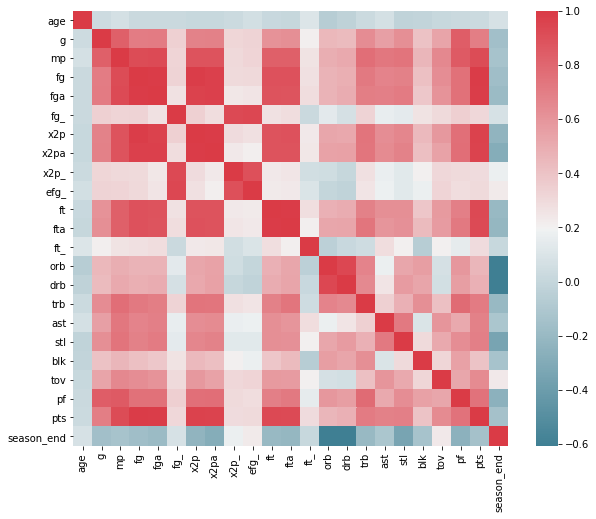

In [136]:
import seaborn as sns
from matplotlib import pyplot as pl

f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [137]:
df.shape

(18802, 27)

In [138]:
df.to_csv(r"basketball_changed_v1.csv", sep=';', encoding='utf-8', index=False)
!mv "/content/basketball_changed_v1.csv" "/content/gdrive/MyDrive/MITMO/Бережков Проектирование ИС/"